In [54]:
import glob
sets = []
sets2 = []
for pthr in glob.glob("ORIGINAL_ASSEMBLY/*_panther.out"):
    if "58" in pthr or "57" in pthr:
        families = set()
        with open(pthr, "r") as f_in:
            for line in f_in:
                families.add(line.split()[1])
        sets2.append(families)
    else:
        families = set()
        with open(pthr, "r") as f_in:
            for line in f_in:
                families.add(line.split()[1])
        sets.append(families)
#for f in sets:
#    print (len(f))
house = set.intersection(*sets)
all_join = [house] + sets2
all_shared = set.intersection(*all_join)
print (len(all_shared))
sample_unique_57_58 = set.intersection(*sets2)
sample_unique = sample_unique_57_58.difference(house)
print (len(sample_unique))
print (len(house))
print (len(sets2[0]), len(sets2[1]))
            
    
    

3
164
293
531 512


In [55]:
from collections import defaultdict
def panther_classify():
	mapping = defaultdict(dict)
	with open("/disk4/PANTHER_v17/PANTHER17.0_HMM_classifications", "r") as f_in:
		for line in f_in:
			has_go = -1
			data = [el.strip() for el in line.split("\t")]
			for pos, el in enumerate(data):
				if "#GO:" in el:
					has_go = pos
			if has_go != -1:
				mapping[data[0]]["GO"] = data[has_go]
			mapping[data[0]]["type"] = data[1]
	return dict(mapping)

In [56]:
doc1 = []
doc2 = []
mapping = panther_classify()
for el in sample_unique:
    go = mapping.get(el, None)
    if go:
        anno = go.get("GO", None)
        doc2.append(go["type"])
        if anno:
            data = anno.split(";")
            for el in data:
                doc1.append(el.split("#")[0])
        
                

In [38]:
from keybert import KeyBERT
import re
doc = open("sample_70.txt", "r").read()
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc2)
for el in keywords[0:15]:
    print (el)

[('dkey', 0.6341), ('si', 0.5071), ('109a10', 0.4818)]
[('domain', 0.527), ('protein', 0.4519), ('set', 0.3502), ('containing', 0.2738), ('related', 0.1743)]
[('receptor', 0.5939), ('transient', 0.4051), ('cation', 0.2958), ('potential', 0.2752), ('channel', 0.2613)]
[('c2h2', 0.5916), ('protein', 0.453), ('domain', 0.3209), ('containing', 0.1533), ('type', 0.1522)]
[('epm2a', 0.7295), ('protein', 0.4041), ('interacting', 0.2792)]
[('tetramerization', 0.4688), ('potassium', 0.4562), ('channel', 0.3063), ('domain', 0.2599), ('containing', 0.0925)]
[('protein', 0.4817), ('ig', 0.3998), ('domain', 0.3497), ('related', 0.2096), ('containing', 0.1812)]
[('subfamily', 0.7819), ('named', 0.4301)]
[('tf2', 0.5337), ('transposon', 0.5165), ('polyprotein', 0.456), ('related', 0.0842)]
[('protein', 0.4624), ('thap', 0.4389), ('domain', 0.2747), ('containing', 0.13)]
[('ch211', 0.7354), ('si', 0.4336), ('196p9', 0.3783), ('related', 0.2898)]
[('marrow', 0.596), ('antigen', 0.5528), ('stromal', 0.4

In [40]:
kw_model.extract_keywords(doc1, keyphrase_ngram_range=(3, 3), stop_words='english', use_maxsum=True, nr_candidates=20, top_n=5)

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('outer membrane endoplasmic', 0.669),
  ('nuclear outer membrane', 0.7445),
  ('reticulum membrane network', 0.8076),
  ('membrane endoplasmic reticulum', 0.8188),
  ('endoplasmic reticulum membrane', 0.8234)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [('activity acting acid', 0.3668),
  ('hydrolase activity acting', 0.6582),
  ('acting acid anhydrides', 0.7182),
  ('anhydrides phosphorus containing', 0.7705),
  ('phosphorus containing anhydrides', 0.7854)],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],

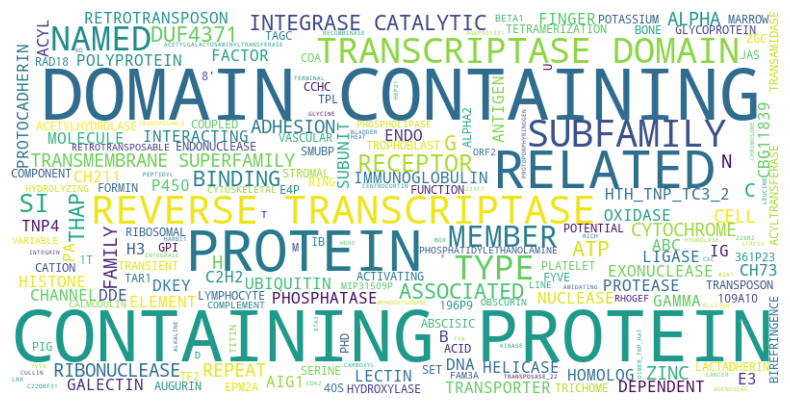

In [57]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(doc2))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()